In [1]:
import gge

In [1]:
from gge import sensors

In [27]:
area = (12.1, 55.60, 12.14, 55.62)  # Define the area, can also give .shp or .geojson file...
time_range = ('2019-01-01', '2024-06-10') 

In [28]:

landsat = sensors.Landsat()

In [29]:

landsat.area = area
landsat.time_range = time_range



In [30]:
landsat.download_data()

No images found in collection LANDSAT/LT04/C02/T1_L2 for the given filters.
No images found in collection LANDSAT/LT05/C02/T1_L2 for the given filters.


2024-06-27 12:38:01,415 - root - INFO - download_data executed in 512.890 seconds. (exception_handler.py:10)


No images found in collection LANDSAT/LC09/C02/T2_L2 for the given filters.


In [32]:
len(landsat.images_data)

66

In [33]:
for key in landsat.images_data[0]["image_bands"].keys():
    print(landsat.images_data[0]["image_bands"][key].max())

19742
20313
20878
26276
25453
24187
79
32
42338
9404
240
192
9922
1110
949
7255
315
13600
0


In [34]:
landsat.dn_to_reflectance()

2024-06-27 12:39:34,434 - root - WARNING - Reflectance scaling factors not found for ST_B6. Available keys: ['IMAGE_QUALITY', 'WRS_TYPE', 'CORRECTION_GAIN_BAND_6_VCID_2', 'CORRECTION_GAIN_BAND_6_VCID_1', 'CORRECTION_GAIN_BAND_2', 'CORRECTION_GAIN_BAND_1', 'TEMPERATURE_ADD_BAND_ST_B6', 'system:footprint', 'REFLECTIVE_SAMPLES', 'TEMPERATURE_MINIMUM_BAND_ST_B6', 'CORRECTION_GAIN_BAND_8', 'CORRECTION_GAIN_BAND_7', 'CORRECTION_GAIN_BAND_5', 'SUN_AZIMUTH', 'CORRECTION_GAIN_BAND_4', 'CORRECTION_GAIN_BAND_3', 'GAIN_CHANGE_BAND_7', 'GAIN_CHANGE_BAND_8', 'GAIN_CHANGE_BAND_5', 'DATE_ACQUIRED', 'GAIN_CHANGE_BAND_3', 'ELLIPSOID', 'GAIN_CHANGE_BAND_4', 'GAIN_CHANGE_BAND_1', 'GAIN_CHANGE_BAND_2', 'SENSOR_MODE', 'STATION_ID', 'DATA_SOURCE_REANALYSIS', 'ORIENTATION', 'WRS_ROW', 'GAIN_BAND_6_VCID_2', 'GAIN_BAND_6_VCID_1', 'CLOUD_COVER', 'COLLECTION_CATEGORY', 'GRID_CELL_SIZE_REFLECTIVE', 'ALGORITHM_SOURCE_SURFACE_TEMPERATURE', 'CLOUD_COVER_LAND', 'GEOMETRIC_RMSE_MODEL', 'COLLECTION_NUMBER', 'DATA_SOURCE

In [35]:
landsat.images_data[0]["image_bands"].keys()

dict_keys(['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'SR_ATMOS_OPACITY', 'SR_CLOUD_QA', 'ST_B6', 'ST_ATRAN', 'ST_CDIST', 'ST_DRAD', 'ST_EMIS', 'ST_EMSD', 'ST_QA', 'ST_TRAD', 'ST_URAD', 'QA_PIXEL', 'QA_RADSAT'])

In [36]:
for key in landsat.images_data[0]["image_bands"].keys():
    print(landsat.images_data[0]["image_bands"][key].max())

0.34290499999999996
0.3586075
0.374145
0.5225900000000001
0.4999575
0.46514249999999996
79
32
42338
9404
240
192
9922
1110
949
7255
315
13600
0


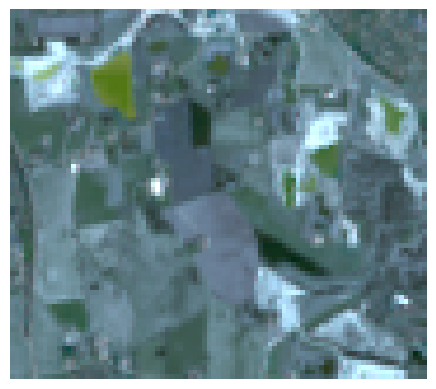

In [62]:
landsat.display_rgb(33, gamma =0.6, gain = 1.2)

In [45]:
landsat.item_type = "NDWI" # normalized difference water index

In [46]:
img, meta = landsat[1]

In [47]:
meta

{'IMAGE_QUALITY': 9,
 'WRS_TYPE': 2,
 'CORRECTION_GAIN_BAND_6_VCID_2': 'CPF',
 'CORRECTION_GAIN_BAND_6_VCID_1': 'CPF',
 'CORRECTION_GAIN_BAND_2': 'CPF',
 'CORRECTION_GAIN_BAND_1': 'CPF',
 'TEMPERATURE_ADD_BAND_ST_B6': 149,
 'system:footprint': {'type': 'LinearRing',
  'coordinates': [[11.336229025757406, 55.37078214032311],
   [11.332749323965093, 55.36198168320722],
   [11.33411092454543, 55.35847731037548],
   [13.254690999311649, 55.0847703009406],
   [14.300532265464417, 54.92131108953855],
   [14.307980300248298, 54.92336511971814],
   [14.313531702781729, 54.93159173495782],
   [14.428654167537859, 55.13868639482606],
   [14.812713869500596, 55.814909121586645],
   [15.005449365849993, 56.14618208085635],
   [15.089555824409711, 56.289151075318195],
   [15.153477182181794, 56.39717166758802],
   [15.197662336115444, 56.472056735374466],
   [15.19467704777172, 56.48072518982623],
   [12.113402468716332, 56.93567127846435],
   [12.10718555027981, 56.92876012128391],
   [12.09801904

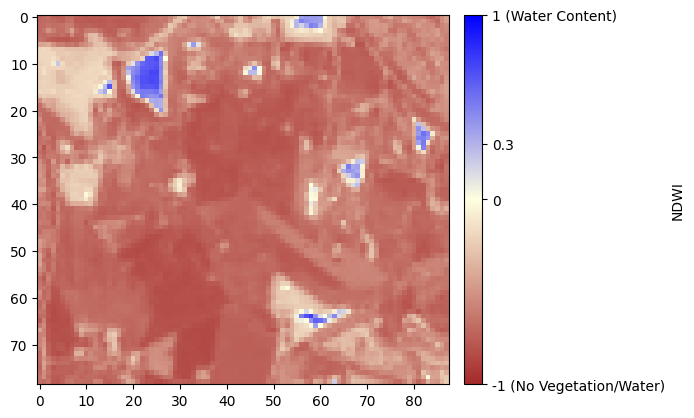

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

img, meta = landsat[50]

# Define a custom normalization class to emphasize differences
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list(
    "ndwi", ["brown", "lightyellow", "blue"], N=256)

# Create a normalized color bar for the NDWI range
norm = MidpointNormalize(vmin=-1, vmax=1, midpoint=0)

# Plot the image
fig, ax = plt.subplots()
cax = ax.imshow(img, cmap=cmap, norm=norm)


# Create a color bar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.046, pad=0.03)
cbar.set_label('NDWI')

# Add labels to the color bar
cbar.set_ticks([-1, 0, 0.3, 1])
cbar.set_ticklabels(['-1 (No Vegetation/Water)', '0', '0.3', '1 (Water Content)'])

plt.show()


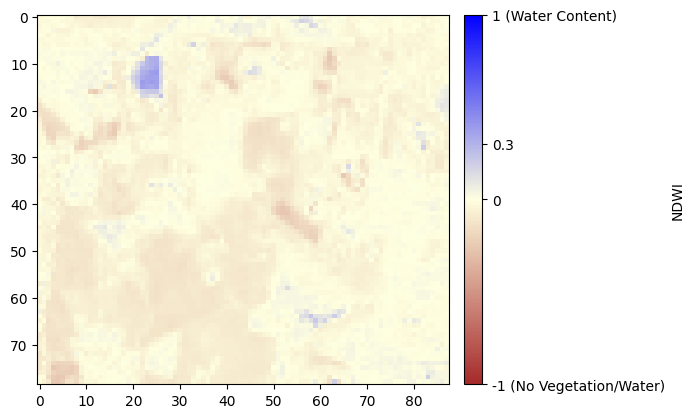

In [53]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

img1, meta = landsat[50]
img2, meta = landsat[51]
img = img1 - img2

# Define a custom normalization class to emphasize differences
class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0, clip=False):
        self.midpoint = midpoint
        mcolors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

# Create a custom color map
cmap = mcolors.LinearSegmentedColormap.from_list(
    "ndwi", ["brown", "lightyellow", "blue"], N=256)

# Create a normalized color bar for the NDWI range
norm = MidpointNormalize(vmin=-1, vmax=1, midpoint=0)

# Plot the image
fig, ax = plt.subplots()
cax = ax.imshow(img, cmap=cmap, norm=norm)


# Create a color bar
cbar = fig.colorbar(cax, ax=ax, orientation='vertical', fraction=0.046, pad=0.03)
cbar.set_label('NDWI')

# Add labels to the color bar
cbar.set_ticks([-1, 0, 0.3, 1])
cbar.set_ticklabels(['-1 (No Vegetation/Water)', '0', '0.3', '1 (Water Content)'])

plt.show()


In [54]:
# we could also use a single band, or another indices
landsat.item_type = "SR_B4"

ndwi for begge billeder

In [55]:
NWDIs = {}
for i in range(len(landsat)):
    img, meta = landsat[i]
    if i not in NWDIs:  # Check if the key does not exist
        NWDIs[i] = {}  # Initialize it as an empty dictionary
    NWDIs[i]["NDWI"] = img
    NWDIs[i]["time"] = meta["L1_DATE_PRODUCT_GENERATED"]
    NWDIs[i]["metadata"] = meta

In [57]:
len(NWDIs)

66

In [56]:
NWDIs[0]["NDWI"]

array([[-0.2      , -0.2      , -0.2      , ...,  0.274705 ,  0.1925625,
         0.168995 ],
       [-0.2      , -0.2      , -0.2      , ...,  0.257105 ,  0.2219325,
         0.18665  ],
       [-0.2      , -0.2      , -0.2      , ...,  0.2160475,  0.2219325,
         0.18665  ],
       ...,
       [ 0.361    ,  0.39576  ,  0.418915 , ...,  0.1569225,  0.16278  ,
         0.215415 ],
       [ 0.39576  ,  0.447735 ,  0.4823025, ...,  0.1745225,  0.1686375,
         0.18621  ],
       [ 0.3841825,  0.4477625,  0.5053475, ...,  0.151065 ,  0.1862375,
         0.18621  ]])

In [65]:

# Assuming NWDIs is a list of dictionaries and each dictionary has an "NDWI" key with an array
arrays = [NWDIs[i]["NDWI"] for i in range(33, 65) if NWDIs[i]["NDWI"].shape == NWDIs[0]["NDWI"].shape]

# Stack arrays along a new axis to create a single array of shape (60, N, M)
combined_array = np.stack(arrays, axis=0)

# combined_array now has shape (60, N, M)

In [67]:
np.save("../data/ndwi_stack_test.npy", combined_array)